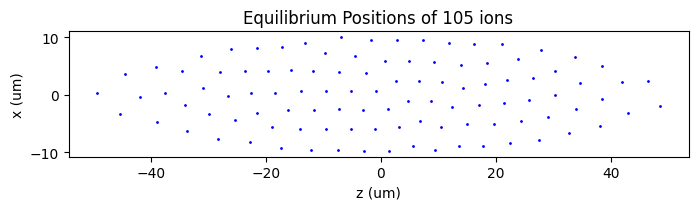

In [22]:
# 计算平衡位置
import os
import numpy as np
import matplotlib.pyplot as plt
N = 105
dt = 0.5*9.022389064166401e-03  # us
start = 0.0
dir_name = f"../data_cache/traj/N={N:d},t0={start:.3f},g=0.1/r/"
Nt = len(list(os.listdir(dir_name)))
t_ls = np.arange(1, Nt+1)*dt + start
ts = 50
tf = 100
mask = (t_ls >= ts) & (t_ls <= tf)
t_ls = t_ls[mask]
Nt = t_ls.size
traj_r = np.zeros((Nt, N, 3))
for t in range(Nt):
        rt = np.load(dir_name+"%.3fus.npy"%t_ls[t])
        traj_r[t] = rt
r_eq = np.mean(traj_r, axis=0) 
np.save("../data_cache/req,N=%d.npy"%N, r_eq)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(r_eq[:, 2], r_eq[:, 0], s=1, c='blue')
ax.set_xlabel('z (um)')
ax.set_ylabel('x (um)')
ax.set_title('Equilibrium Positions of %d ions'%N)
ax.set_aspect('equal', 'box')
plt.show()

/tmp/ipykernel_743651/133133633.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


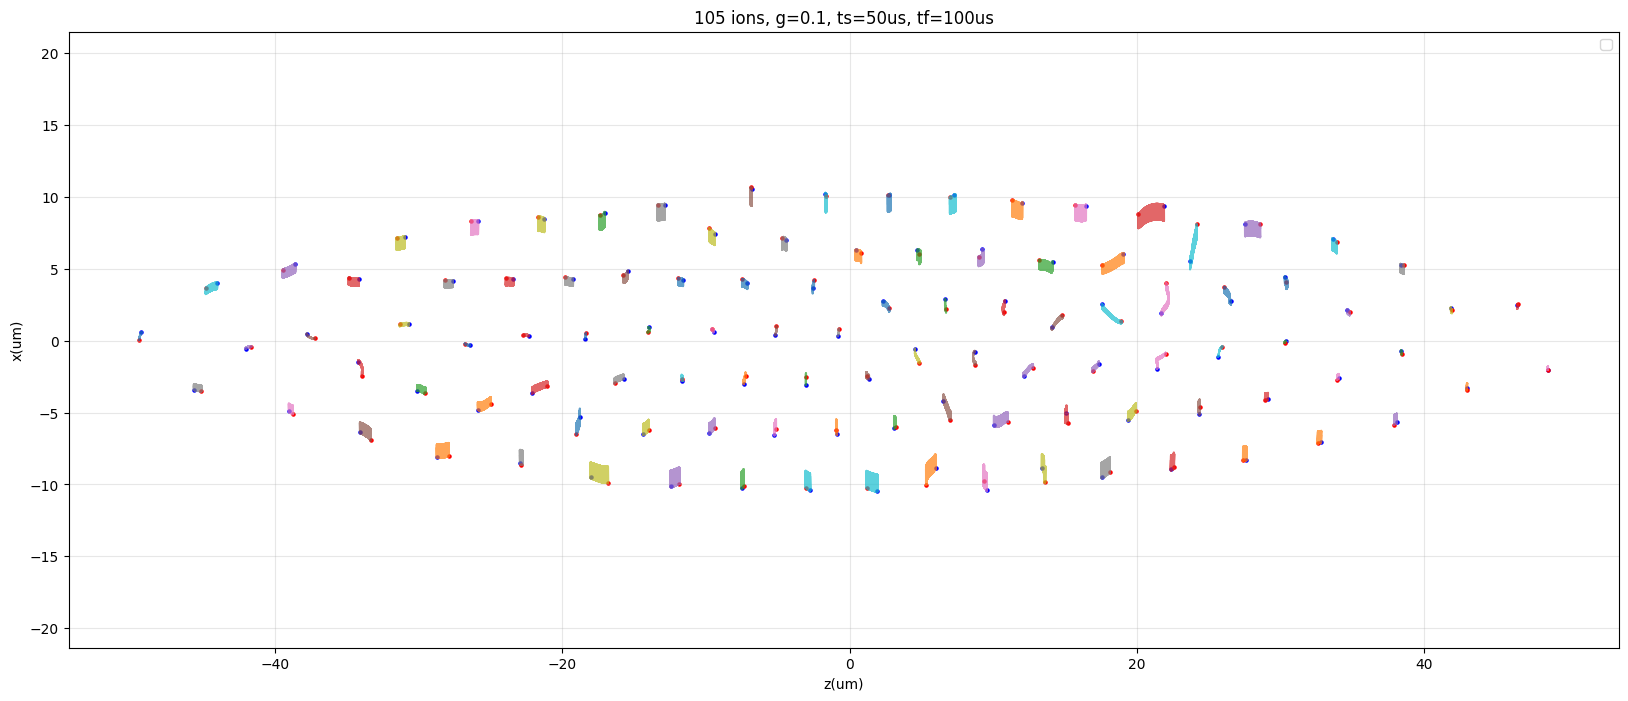

In [23]:
# 静态画所有轨迹
traj = traj_r
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(N):
    ax.plot(traj[:, i, 2], traj[:, i, 0], 
             lw=1.5, alpha=0.7)
ax.scatter(traj[0, :, 2], traj[0, :, 0], s=5, c='b')
ax.scatter(traj[-1, :, 2], traj[-1, :, 0], s=5, c='r')
ax.set_aspect('equal')    

plt.title(f'{N:d} ions, g=0.1, ts={ts:.6g}us, tf={tf:.6g}us')
plt.xlabel('z(um)')
plt.ylabel('x(um)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

In [24]:
# Hc
# CPU Parallel in Hc
from scipy.constants import e, pi, epsilon_0
from concurrent.futures import ProcessPoolExecutor
from numpy.linalg import norm, eigvalsh
import time
import numpy as np

def hessian_i(i, R):
    start_i = time.time()
    res = np.zeros((3, 3*N))
    for j in range(N):
        if i == j:
            continue
        else:
            rij = R[i] - R[j]
            r = norm(rij) + 1e-20
            outer = np.outer(rij, rij)
            block = np.eye(3)/(r**3) - 3*outer/(r**5)
            # 对称填充 Hessian
            res[:, 3*j:3*j+3] = block
    res[:, 3*i:3*i+3] = -sum(res[:, 3*j:3*j+3] for j in range(N))
    end_i = time.time()
    print("Finished %d, taking %.3f s"%(i, end_i-start_i))
    return i, res

def hessian_parallel(R):
    R = R.reshape(N, 3)
    H = np.zeros((3*N, 3*N))
    with ProcessPoolExecutor(max_workers=12) as executor:
        futures = [executor.submit(hessian_i, i, R) for i in range(N)]
        for future in futures:
            i, res = future.result()
            H[3*i:3*i+3, :] = res
    return H*e**2/(4*pi*epsilon_0)

if __name__ == "__main__":
    r = r_eq
    N = r.shape[0]
    start = time.time()
    Hc = hessian_parallel(r*1e-6)  # SI
    # np.save("../data_cache/%d/hessian_coulomb.npy"%N, Hc)
    end = time.time()
    print(end-start)

Finished 5, taking 0.001 sFinished 0, taking 0.001 sFinished 8, taking 0.001 sFinished 4, taking 0.001 sFinished 7, taking 0.001 sFinished 11, taking 0.001 sFinished 1, taking 0.001 sFinished 9, taking 0.001 sFinished 2, taking 0.002 s



Finished 6, taking 0.003 s
Finished 12, taking 0.001 sFinished 21, taking 0.001 sFinished 27, taking 0.001 s
Finished 3, taking 0.004 s
Finished 10, taking 0.002 s



Finished 14, taking 0.001 sFinished 13, taking 0.001 s
Finished 15, taking 0.001 sFinished 16, taking 0.001 sFinished 19, taking 0.001 s
Finished 17, taking 0.001 s
Finished 20, taking 0.001 s




Finished 18, taking 0.002 sFinished 23, taking 0.001 sFinished 24, taking 0.001 sFinished 25, taking 0.001 s

Finished 22, taking 0.002 sFinished 26, taking 0.001 s
Finished 28, taking 0.001 s


Finished 29, taking 0.002 s


Finished 32, taking 0.001 s
Finished 30, taking 0.002 sFinished 33, taking 0.001 s
Finished 35, taking 0.001 sFinished 34, taking 0.001 sFinished 31, taking 0.003 sFinished




Finished 79, taking 0.001 s

Finished 80, taking 0.001 s
Finished 78, taking 0.002 sFinished 81, taking 0.001 s
Finished 83, taking 0.001 sFinished 82, taking 0.001 s


Finished 84, taking 0.001 s
Finished 86, taking 0.001 sFinished 85, taking 0.002 s
Finished 88, taking 0.001 s

Finished 89, taking 0.001 sFinished 87, taking 0.002 s
Finished 90, taking 0.001 s

Finished 91, taking 0.001 s

Finished 92, taking 0.001 sFinished 93, taking 0.001 s

Finished 96, taking 0.001 s
Finished 97, taking 0.001 sFinished 94, taking 0.002 sFinished 95, taking 0.002 sFinished 98, taking 0.001 sFinished 100, taking 0.001 s
Finished 99, taking 0.001 s




Finished 101, taking 0.001 s
Finished 102, taking 0.001 sFinished 103, taking 0.001 s


Finished 104, taking 0.002 s


In [25]:
print(np.max(Hc), np.min(Hc), np.mean(np.abs(Hc)))

2.0615104565094413e-11 -3.3020041000110775e-11 1.5677748806314458e-13


In [2]:
# 计算电势的格点分布
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, pi, epsilon_0
from scipy.signal import savgol_filter
import csv
import json
import math

# 从 monolithic.py 中复制的参数和函数
filename = "../../data/monolithic20241118.csv"
basis_filename = "./electrode_basis.json"
flag_smoothing = True

# 物理参数
Vrf = 550/2  # RF电压振幅
freq_RF = 35.28  # RF射频频率@MHz
Omega = freq_RF*2*pi*10**6  # RF射频角频率@SI
m = 2.239367e-25  # Ba135 离子的质量 @SI
ec = e  # 元电荷@SI
epsl = 8.854*10**(-12)  # 真空介电常数@SI

# 归一化参数
dt = 2/Omega  # 单位时间dt
dl = ((ec**2)/(4*pi*m*epsl*(Omega)**2))**(1/3)  # 单位长度dl
dV = m/ec*(dl/dt)**2  # 单位电压dV

print('dt =', dt, 'dl =', dl, 'dV =', dV)

# 电压设定
V_static = {"RF":-8, "U1":0, "U2":0, "U3":0, "U4":-1, "U5":0, "U6":0, "U7":0}
V_dynamic = {"RF": [Vrf, lambda t: np.cos(2*t)]}  # 动态电压设置

# 工具函数
def smoothing(data):
    return savgol_filter(data, 11, 3)

def loadConfig(fileName):
    try:
        with open(fileName, 'r', encoding='utf-8') as jf:
            config = json.load(jf)
        return config
    except Exception as er:
        print(f"无法加载配置文件 {fileName}: {er}")
        return {}

def interpret_voltage(value):
    if type(value) == list:
        return value[0]
    return value

# Data_Loader 类
class Data_Loader:
    def __init__(self, filename=filename):
        self.filename = filename
        self.data = []
        self.keymaps = {}
        self.keynames = []
        self.basis = {}
        self.unit_l = 1e-3
        self.basisGroup_map = {}
        self.units = {"m": 1e0, "cm": 1e-2, "mm": 1e-3, "um": 1e-6}
        self.smoothing = smoothing
        self.grids_dc = None
        self.grids_rf = None
        
    def getcol(self, key):
        """把电势场名key转换为表格的列序号"""
        if key in self.keymaps:
            return self.keymaps[key]
        else:
            cols = [v for k, v in self.keymaps.items() if (key == k.split(".")[0])]
            return cols[0] if len(cols) > 0 else None
    
    def loadData(self, name=None):
        """读取加载电势场格点文件数据"""
        try:
            self.load_Settings_CustomBasis()
            print("加载自定义Basis设置")
        except Exception as er:
            print(er)
        
        if name is None:
            name = self.filename
        
        with open(name, encoding='utf-8', mode='r+') as file_read:
            csvread = csv.reader(file_read)
            for i, row in enumerate(csvread):
                if i > 20:
                    break
                if row[0] == r'% Length unit':
                    self.unit_l = self.units[row[1]]
                    print("self.unit_l =", self.unit_l)
                if row[0] == r'% x':
                    self.keymaps = {row[v].replace(r"% ", ""): v for v in range(len(row))}
                    self.keynames = [name for name in self.keymaps if name not in ["x", "y", "z"]]
                    break
        
        dat = pd.read_csv(name, comment='%', header=None)
        data = dat.to_numpy()
        data[:, 3:] *= 1/dV  # csv文件内的电势单位：V
        data[:, 0:3] *= self.unit_l/dl  # csv文件内坐标的长度单位：mm
        
        data = data[np.lexsort([data[:, 2], data[:, 1], data[:, 0]])]  # 统一排序
        self.coordinate = [self.x, self.y, self.z] = [x, y, z] = [np.unique(data[:, i]) for i in range(3)]
        self.coordinate_um = [temp/(1e-6/dl) for temp in self.coordinate]
        self.data = data
    
    def load_basis(self, key):
        """加载电势场名key的格点数据"""
        coln = self.getcol(key)
        
        if coln is None:
            # 从 basisGroup_map 中查找
            if key in self.basisGroup_map:
                basis_key = self.basisGroup_map[key]
                outputs = self.load_basis(basis_key)
            else:
                raise ValueError(f"无法找到电势场: {key}")
        else:
            outputs = self.data[:, coln].reshape(len(self.x), len(self.y), len(self.z))
        
        if flag_smoothing and self.smoothing is not None:
            outputs = self.smoothing(outputs)
        return outputs
    
    def load_Settings_CustomBasis(self):
        """加载自定义Basis设置"""
        self.basisGroup_map = loadConfig(basis_filename)

# 赝势计算函数
def pseudo_potential(data_loader):
    """计算RF场的赝势"""
    V0 = data_loader.load_basis("RF") * interpret_voltage(Vrf) * ec * dV  # 国际单位制
    [x, y, z] = data_loader.coordinate_um  # 换算成国际单位制
    Fx, Fy, Fz = np.gradient(-V0, x, y, z, edge_order=2)
    F0 = np.sqrt(Fx**2 + Fy**2 + Fz**2) * 1e6  # 因为距离单位为um，所以梯度要乘1e6
    V_pseudo_rf = F0**2 / (4 * m * Omega**2 * ec)
    return V_pseudo_rf

# 加载数据
print("正在加载数据...")
data_loader = Data_Loader(filename)
data_loader.loadData()

# 计算静态电势
print("正在计算静态电势...")
# 单位说明：
# - data_loader.load_basis(key) 返回的是归一化单位（在loadData中已通过 data[:, 3:] *= 1/dV 转换）
# - V_static中的值（如-8）是实际电压值（V），但在计算时：
#   potential_static = sum(load_basis(key) * value)
#   这里load_basis(key)是"单位电压下的归一化电势场"，乘以value后得到"归一化电势场"
#   所以potential_static的单位是归一化单位（无量纲）
potential_static = 0
for key, value in V_static.items():
    potential_static = potential_static + data_loader.load_basis(key) * interpret_voltage(value)

# 计算动态电势（赝势）
print("正在计算动态电势（赝势）...")
# 单位说明：
# - pseudo_potential()函数内部：
#   1. V0 = load_basis("RF") * Vrf * ec * dV
#      load_basis("RF")是归一化单位，乘以Vrf(V)、ec(C)、dV(V)后，V0的单位是V（SI单位）
#   2. V_pseudo_rf = F0^2/(4*m*Omega^2*ec)，返回的是SI单位的电势（V）
# - 所以V_pseudo的单位是SI单位（V），需要除以dV转换为归一化单位
V_pseudo = pseudo_potential(data_loader)

# 转换为国际单位制（用于可视化）
# 注意：这里转换为SI单位只是为了显示，实际计算时使用归一化单位
Vs = potential_static * dV  # 静态电势 (V) - 从归一化单位转换为SI单位
Vp = V_pseudo  # 赝势 (V) - 已经是SI单位
V_total = Vs + Vp  # 总电势 (V) - 用于可视化

print(f"静态电势形状: {Vs.shape}")
print(f"赝势形状: {Vp.shape}")
print(f"总电势形状: {V_total.shape}")
print(f"静态电势范围: [{np.min(Vs):.3e}, {np.max(Vs):.3e}] V")
print(f"赝势范围: [{np.min(Vp):.3e}, {np.max(Vp):.3e}] V")
print(f"总电势范围: [{np.min(V_total):.3e}, {np.max(V_total):.3e}] V")

# 保存坐标和电势
[x, y, z] = data_loader.coordinate_um
print(f"\n格点坐标范围:")
print(f"x: [{np.min(x):.3f}, {np.max(x):.3f}] um")
print(f"y: [{np.min(y):.3f}, {np.max(y):.3f}] um")
print(f"z: [{np.min(z):.3f}, {np.max(z):.3f}] um")

dt = 9.022389064166401e-09 dl = 2.757463340646677e-07 dV = 0.0013055432790611363
正在加载数据...
加载自定义Basis设置
self.unit_l = 0.001
正在计算静态电势...
正在计算动态电势（赝势）...
静态电势形状: (101, 51, 201)
赝势形状: (101, 51, 201)
总电势形状: (101, 51, 201)
静态电势范围: [-7.004e+00, -6.119e+00] V
赝势范围: [1.136e-07, 1.102e+00] V
总电势范围: [-6.355e+00, -5.592e+00] V

格点坐标范围:
x: [-100.000, 100.000] um
y: [-50.000, 50.000] um
z: [-600.000, 600.000] um


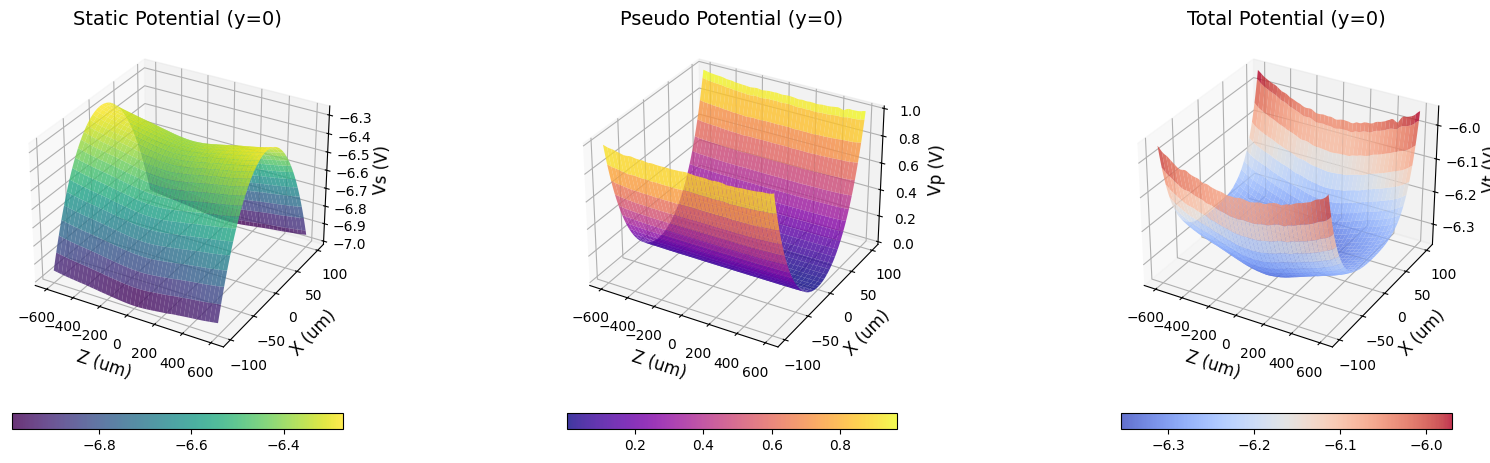

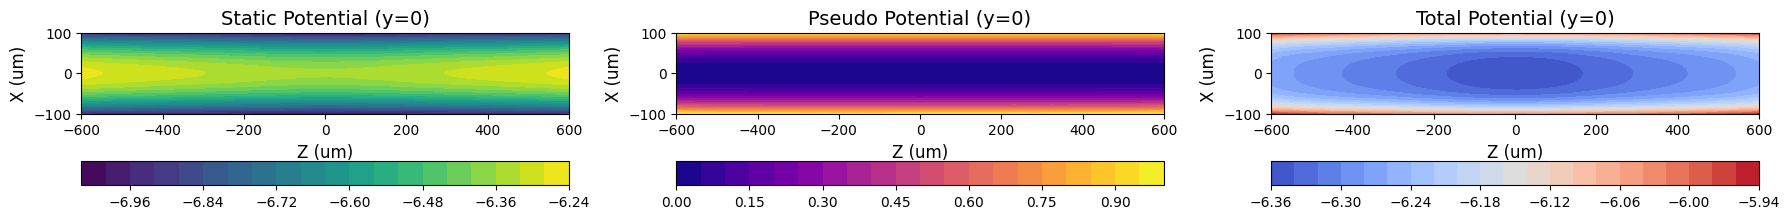

In [4]:
# 可视化电势分布
# 选择 y=0 的截面进行可视化
shape = Vs.shape
y_mid = int(np.ceil(shape[1]/2))

# 提取 y=0 截面的电势
Vs_y0 = Vs[:, y_mid, :]  # 静态电势
Vp_y0 = Vp[:, y_mid, :]  # 赝势
Vt_y0 = V_total[:, y_mid, :]  # 总电势

# 创建网格
X, Z = np.meshgrid(z, x)

# 绘制3D表面图
fig = plt.figure(figsize=(18, 5))

# 静态电势
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X, Z, Vs_y0, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Z (um)', fontsize=12)
ax1.set_ylabel('X (um)', fontsize=12)
ax1.set_zlabel('Vs (V)', fontsize=12)
ax1.set_title('Static Potential (y=0)', fontsize=14)
plt.colorbar(surf1, ax=ax1, shrink=0.5, orientation='horizontal', pad=0.1)

# 赝势
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, Z, Vp_y0, cmap='plasma', alpha=0.8)
ax2.set_xlabel('Z (um)', fontsize=12)
ax2.set_ylabel('X (um)', fontsize=12)
ax2.set_zlabel('Vp (V)', fontsize=12)
ax2.set_title('Pseudo Potential (y=0)', fontsize=14)
plt.colorbar(surf2, ax=ax2, shrink=0.5, orientation='horizontal', pad=0.1)

# 总电势
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(X, Z, Vt_y0, cmap='coolwarm', alpha=0.8)
ax3.set_xlabel('Z (um)', fontsize=12)
ax3.set_ylabel('X (um)', fontsize=12)
ax3.set_zlabel('Vt (V)', fontsize=12)
ax3.set_title('Total Potential (y=0)', fontsize=14)
plt.colorbar(surf3, ax=ax3, shrink=0.5, orientation='horizontal', pad=0.1)

plt.tight_layout()
plt.show()

# 绘制2D等高线图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 静态电势等高线
cont1 = axes[0].contourf(X, Z, Vs_y0, levels=20, cmap='viridis')
axes[0].set_xlabel('Z (um)', fontsize=12)
axes[0].set_ylabel('X (um)', fontsize=12)
axes[0].set_title('Static Potential (y=0)', fontsize=14)
axes[0].set_aspect('equal')
plt.colorbar(cont1, ax=axes[0], orientation='horizontal', pad=0.1)

# 赝势等高线
cont2 = axes[1].contourf(X, Z, Vp_y0, levels=20, cmap='plasma')
axes[1].set_xlabel('Z (um)', fontsize=12)
axes[1].set_ylabel('X (um)', fontsize=12)
axes[1].set_title('Pseudo Potential (y=0)', fontsize=14)
axes[1].set_aspect('equal')
plt.colorbar(cont2, ax=axes[1], orientation='horizontal', pad=0.1)

# 总电势等高线
cont3 = axes[2].contourf(X, Z, Vt_y0, levels=20, cmap='coolwarm')
axes[2].set_xlabel('Z (um)', fontsize=12)
axes[2].set_ylabel('X (um)', fontsize=12)
axes[2].set_title('Total Potential (y=0)', fontsize=14)
axes[2].set_aspect('equal')
plt.colorbar(cont3, ax=axes[2], orientation='horizontal', pad=0.1)

plt.tight_layout()
plt.show()

In [5]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())  # 应为 True
print(torch.version.cuda)
# print(torch.cuda.get_device_name(0))

2.9.1+cu130
False
13.0


使用设备: cpu
网格边界: min=[np.float64(-362.65214672363476), np.float64(-181.32607336131738), np.float64(-2175.9128803468084)], max=[np.float64(362.65214672363476), np.float64(181.32607336131738), np.float64(2175.9128803468084)]
格点尺寸: x=101, y=51, z=201
已创建PyTorch tensors
已定义PyTorch能量函数（支持自动微分）
使用随机初始位置，范围: 150

初始总能量: -1.454052e+06 (归一化单位)

开始PyTorch能量最小化优化...
优化变量数: 900 (3 × 300)
使用L-BFGS优化器（带边界约束）
迭代 0: 能量 = -1.454052e+06, 变化 = 0.000000e+00
收敛于迭代 4

优化完成！耗时: 0.18 秒
最终总能量: -1.458481e+06 (归一化单位)
能量降低: 4.428500e+03 (归一化单位)

平衡位置统计:
x范围: [-22.199, 21.793] um
y范围: [-0.085, 1.322] um
z范围: [-122.136, 135.678] um

平衡位置已保存到: ../data_cache/req,N=300.npy


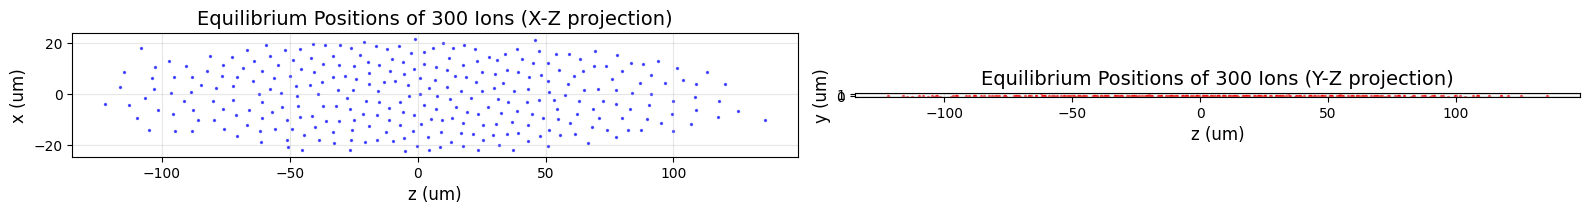

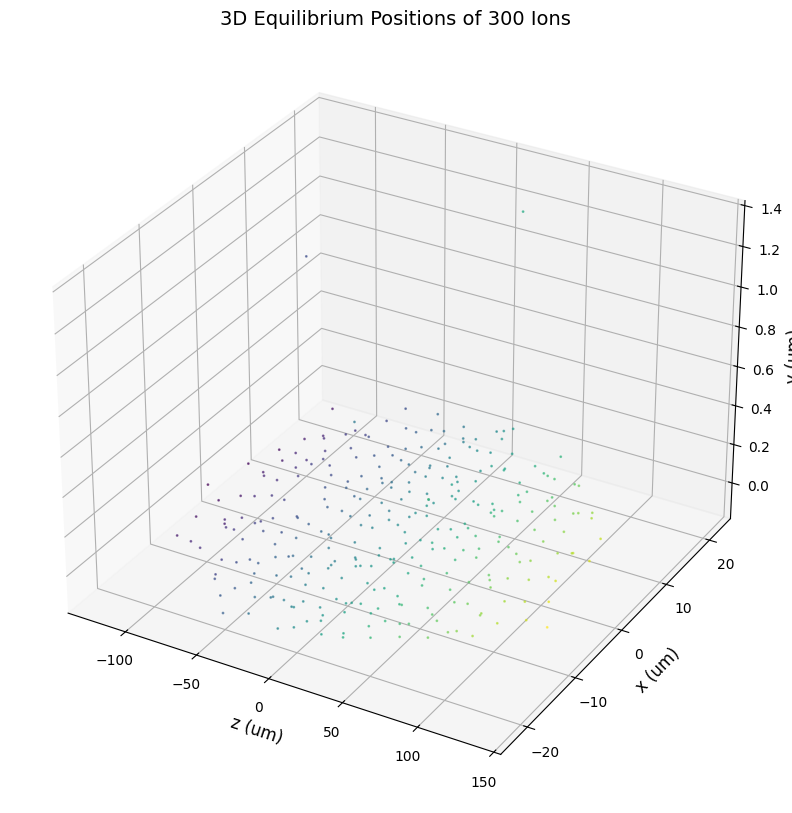


计算完成！


In [6]:
# 通过能量最小化计算300个Ba135单电子离子的平衡位置（使用PyTorch加速）
import torch
import torch.nn.functional as F
from scipy.constants import e, pi, epsilon_0
from numpy.linalg import norm
import time

# 检查是否有GPU可用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

# 设置离子数量
N_ions = 300

# 物理参数
charge_val = ec  # 每个离子带1个元电荷

# 计算边界
bound_min = [np.min(data_loader.coordinate[i]) + 1e-9 for i in range(3)]
bound_max = [np.max(data_loader.coordinate[i]) - 1e-9 for i in range(3)]
print(f"网格边界: min={bound_min}, max={bound_max}")

# 创建总电势场的插值器（静态电势 + 赝势）
# 总电势 = 静态电势 + 赝势（归一化单位）
#
# 单位转换说明：
# 1. potential_static: 已经是归一化单位（无量纲）
#    - data_loader.load_basis(key) 在loadData中已通过 data[:, 3:] *= 1/dV 转换为归一化单位
#    - 所以 potential_static = sum(load_basis(key) * value) 的单位是归一化单位
#
# 2. V_pseudo: 是SI单位（V）
#    - pseudo_potential()函数返回的是SI单位的电势（V）
#    - 需要除以dV转换为归一化单位：V_pseudo / dV
#
# 因此：V_total_normalized = potential_static + V_pseudo / dV
#       (归一化单位) = (归一化单位) + (V) / (V) = 归一化单位
V_total_normalized = potential_static + V_pseudo / dV  # 归一化单位

[x, y, z] = data_loader.coordinate
print(f"格点尺寸: x={len(x)}, y={len(y)}, z={len(z)}")

# 将格点坐标和电势转换为PyTorch tensor
x_tensor = torch.tensor(x, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y, dtype=torch.float32, device=device)
z_tensor = torch.tensor(z, dtype=torch.float32, device=device)
V_total_tensor = torch.tensor(V_total_normalized, dtype=torch.float32, device=device)

# 归一化参数转换为tensor
dl_tensor = torch.tensor(dl, dtype=torch.float32, device=device)
dt_tensor = torch.tensor(dt, dtype=torch.float32, device=device)
m_tensor = torch.tensor(m, dtype=torch.float32, device=device)
ec_tensor = torch.tensor(ec, dtype=torch.float32, device=device)
epsl_tensor = torch.tensor(epsilon_0, dtype=torch.float32, device=device)

# 边界转换为tensor
bound_min_tensor = torch.tensor(bound_min, dtype=torch.float32, device=device)
bound_max_tensor = torch.tensor(bound_max, dtype=torch.float32, device=device)

# 库伦常数
k_coulomb = ec_tensor**2 / (4 * pi * epsl_tensor)

print("已创建PyTorch tensors")

# 定义PyTorch能量函数（支持自动微分）
def total_energy_torch(r_tensor):
    """
    计算系统的总能量（PyTorch版本，支持自动微分）
    r_tensor: 位置tensor (shape: (N, 3))
    返回: 总能量标量tensor（归一化单位）
    """
    # 1. 势场能量（静态电势 + 赝势）
    # 使用三线性插值（手动实现，支持自动微分）
    # 检查边界
    in_bounds = ((r_tensor[:, 0] >= bound_min_tensor[0]) & (r_tensor[:, 0] <= bound_max_tensor[0]) &
                 (r_tensor[:, 1] >= bound_min_tensor[1]) & (r_tensor[:, 1] <= bound_max_tensor[1]) &
                 (r_tensor[:, 2] >= bound_min_tensor[2]) & (r_tensor[:, 2] <= bound_max_tensor[2]))
    
    # 找到每个离子在格点中的位置（归一化索引）
    idx_x = (r_tensor[:, 0] - bound_min_tensor[0]) / (bound_max_tensor[0] - bound_min_tensor[0]) * (len(x) - 1)
    idx_y = (r_tensor[:, 1] - bound_min_tensor[1]) / (bound_max_tensor[1] - bound_min_tensor[1]) * (len(y) - 1)
    idx_z = (r_tensor[:, 2] - bound_min_tensor[2]) / (bound_max_tensor[2] - bound_min_tensor[2]) * (len(z) - 1)
    
    # 找到包围盒的8个顶点
    x0 = torch.floor(idx_x).long().clamp(0, len(x) - 2)
    x1 = x0 + 1
    y0 = torch.floor(idx_y).long().clamp(0, len(y) - 2)
    y1 = y0 + 1
    z0 = torch.floor(idx_z).long().clamp(0, len(z) - 2)
    z1 = z0 + 1
    
    # 插值权重
    wx = idx_x - x0.float()
    wy = idx_y - y0.float()
    wz = idx_z - z0.float()
    
    # 向量化三线性插值
    # 使用高级索引获取8个顶点的值
    c000 = V_total_tensor[x0, y0, z0]
    c001 = V_total_tensor[x0, y0, z1]
    c010 = V_total_tensor[x0, y1, z0]
    c011 = V_total_tensor[x0, y1, z1]
    c100 = V_total_tensor[x1, y0, z0]
    c101 = V_total_tensor[x1, y0, z1]
    c110 = V_total_tensor[x1, y1, z0]
    c111 = V_total_tensor[x1, y1, z1]
    
    # 三线性插值（向量化）
    c00 = c000 * (1 - wz) + c001 * wz
    c01 = c010 * (1 - wz) + c011 * wz
    c10 = c100 * (1 - wz) + c101 * wz
    c11 = c110 * (1 - wz) + c111 * wz
    
    c0 = c00 * (1 - wy) + c01 * wy
    c1 = c10 * (1 - wy) + c11 * wy
    
    V_interp = c0 * (1 - wx) + c1 * wx
    
    # 超出边界的惩罚
    penalty = torch.where(in_bounds, torch.tensor(0.0, device=device), torch.tensor(1e10, device=device))
    potential_energy = (V_interp * charge_val / ec_tensor).sum() + penalty.sum()
    
    # 2. 库伦相互作用能量（向量化计算）
    # 计算所有离子对之间的距离
    r_expanded_i = r_tensor.unsqueeze(1)  # (N, 1, 3)
    r_expanded_j = r_tensor.unsqueeze(0)  # (1, N, 3)
    rij = r_expanded_i - r_expanded_j  # (N, N, 3)
    r_norm = torch.norm(rij, dim=2) * dl_tensor  # (N, N) in SI units
    
    # 避免自相互作用和除零
    mask = torch.eye(N_ions, device=device, dtype=torch.bool)
    r_norm = r_norm + mask.float() * 1e-20  # 将对角线设为小值
    
    # 库伦能量: k * q^2 / r
    E_coulomb_matrix = k_coulomb / r_norm  # (N, N)
    E_coulomb_matrix = E_coulomb_matrix * (~mask).float()  # 移除自相互作用
    coulomb_energy = E_coulomb_matrix.sum() / 2  # 除以2因为每对计算了两次
    
    # 转换为归一化单位
    coulomb_energy_norm = coulomb_energy * dt_tensor**2 / (m_tensor * dl_tensor**2)
    
    total_E = potential_energy + coulomb_energy_norm
    return total_E

print("已定义PyTorch能量函数（支持自动微分）")

# 初始化离子位置
ini_range = 150  # 初始分布范围
if os.path.exists(f"../data_cache/status/N={N_ions}/r/29.774us.npy"): #初始从某个动力学演化的状态开始
    print(f"从已有平衡位置加载: req,N={N_ions}.npy")
    r0_um = np.load(f"../data_cache/status/N={N_ions}/r/29.774us.npy")
    r0 = r0_um / (1e-6 * dl)  # 转换为归一化单位
else:
    print(f"使用随机初始位置，范围: {ini_range}")
    r0 = (np.random.rand(N_ions, 3) - 0.5) * ini_range

# 转换为PyTorch tensor并设置为需要梯度
r_tensor = torch.tensor(r0, dtype=torch.float32, device=device, requires_grad=True)

# 计算初始能量
with torch.no_grad():
    E_initial = total_energy_torch(r_tensor).item()
print(f"\n初始总能量: {E_initial:.6e} (归一化单位)")

# 使用PyTorch的L-BFGS优化器
optimizer = torch.optim.LBFGS(
    [r_tensor],
    lr=1.0,
    max_iter=20,
    max_eval=None,
    tolerance_grad=1e-7,
    tolerance_change=1e-9,
    history_size=100,
    line_search_fn='strong_wolfe'
)

# 定义闭包函数（L-BFGS需要）
def closure():
    optimizer.zero_grad()
    energy = total_energy_torch(r_tensor)
    energy.backward()
    
    # 应用边界约束（通过裁剪）
    with torch.no_grad():
        r_tensor[:, 0].clamp_(bound_min_tensor[0], bound_max_tensor[0])
        r_tensor[:, 1].clamp_(bound_min_tensor[1], bound_max_tensor[1])
        r_tensor[:, 2].clamp_(bound_min_tensor[2], bound_max_tensor[2])
    
    return energy

print(f"\n开始PyTorch能量最小化优化...")
print(f"优化变量数: {N_ions * 3} (3 × {N_ions})")
print(f"使用L-BFGS优化器（带边界约束）")

# 执行优化
start_time = time.time()
max_iterations = 200
E_prev = E_initial
for iteration in range(max_iterations):
    energy = closure()
    optimizer.step(closure)
    
    with torch.no_grad():
        E_current = energy.item()
        if iteration % 10 == 0:
            print(f"迭代 {iteration}: 能量 = {E_current:.6e}, 变化 = {E_prev - E_current:.6e}")
        
        # 检查收敛
        if iteration > 0 and abs(E_prev - E_current) < 1e-8:
            print(f"收敛于迭代 {iteration}")
            break
        E_prev = E_current

elapsed_time = time.time() - start_time

# 提取最终结果
with torch.no_grad():
    r_equilibrium = r_tensor.cpu().numpy()
    E_final = total_energy_torch(r_tensor).item()

print(f"\n优化完成！耗时: {elapsed_time:.2f} 秒")
print(f"最终总能量: {E_final:.6e} (归一化单位)")
print(f"能量降低: {E_initial - E_final:.6e} (归一化单位)")

# 转换为微米单位
r_eq_um = r_equilibrium * dl * 1e6

print(f"\n平衡位置统计:")
print(f"x范围: [{np.min(r_eq_um[:, 0]):.3f}, {np.max(r_eq_um[:, 0]):.3f}] um")
print(f"y范围: [{np.min(r_eq_um[:, 1]):.3f}, {np.max(r_eq_um[:, 1]):.3f}] um")
print(f"z范围: [{np.min(r_eq_um[:, 2]):.3f}, {np.max(r_eq_um[:, 2]):.3f}] um")

# 保存平衡位置
save_path = f"../data_cache/req,N={N_ions}.npy"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
np.save(save_path, r_eq_um)
print(f"\n平衡位置已保存到: {save_path}")

# 可视化平衡位置
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# X-Z 投影
axes[0].scatter(r_eq_um[:, 2], r_eq_um[:, 0], s=2, alpha=0.6, c='blue')
axes[0].set_xlabel('z (um)', fontsize=12)
axes[0].set_ylabel('x (um)', fontsize=12)
axes[0].set_title(f'Equilibrium Positions of {N_ions} Ions (X-Z projection)', fontsize=14)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# Y-Z 投影
axes[1].scatter(r_eq_um[:, 2], r_eq_um[:, 1], s=2, alpha=0.6, c='red')
axes[1].set_xlabel('z (um)', fontsize=12)
axes[1].set_ylabel('y (um)', fontsize=12)
axes[1].set_title(f'Equilibrium Positions of {N_ions} Ions (Y-Z projection)', fontsize=14)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3D可视化
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_eq_um[:, 2], r_eq_um[:, 0], r_eq_um[:, 1], s=1, alpha=0.6, c=r_eq_um[:, 2], cmap='viridis')
ax.set_xlabel('z (um)', fontsize=12)
ax.set_ylabel('x (um)', fontsize=12)
ax.set_zlabel('y (um)', fontsize=12)
ax.set_title(f'3D Equilibrium Positions of {N_ions} Ions', fontsize=14)
plt.show()

print("\n计算完成！")

In [26]:
# Hf
fx = 0.9926366729551477*1e6
fy = 2.0506600594125324*1e6
fz = 0.09298249214574596*1e6
wx, wy, wz = 2*pi*fx, 2*pi*fy, 2*pi*fz
m = 2.239367e-25  # kg
Hf = np.zeros((3*N, 3*N))
for i in range(N):
    Hf[3*i, 3*i] = m*wx**2
    Hf[3*i+1, 3*i+1] = m*wy**2
    Hf[3*i+2, 3*i+2] = m*wz**2
print(np.max(Hf), np.min(Hf), np.mean(np.abs(Hf)))

3.717683006538206e-11 0.0 4.863938270212726e-14


In [27]:
# H
H = Hc + Hf
eigenvalues = eigvalsh(H)
frequencies = np.sqrt(np.abs( eigenvalues)/m)/(2*pi*1e6)  #MHz
print(np.max(frequencies), np.min(frequencies), np.mean(frequencies))

2.2103974939232365 0.06189211540799733 1.2051495205713663


In [28]:
mask = frequencies>2.05
print("Number of modes above 2.05 MHz:", np.sum(mask))

Number of modes above 2.05 MHz: 9


ValueError: invalid literal for int() with base 10: '[0, 1]'

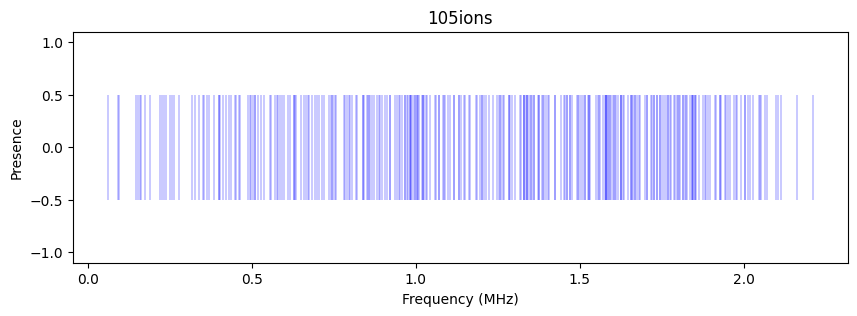

In [30]:
plt.figure(figsize=(10, 3))
plt.eventplot(frequencies, lineoffsets=0, linelengths=1, orientation='horizontal', colors='blue', linewidths=0.3)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Presence")
plt.title("%dions"%N)
plt.show()

In [ ]:
# 300离子平衡位置
